In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Engineering_graduate_salary.csv")

In [4]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,794381,m,12/17/1991,89.00,cbse,2010,85.20,cbse,8346,2,...,-1,1.1336,0.3789,-0.2974,-0.3612,-1.2440,325000,NaN,NaN,NaN
1,480729,m,6/18/1986,83.50,ap state board,2003,87.30,ap intermediate board,12487,2,...,-1,-1.4992,-0.7863,-2.0131,0.4148,-0.6035,120000,NaN,NaN,NaN
2,94788,f,4/8/1988,96.00,"stjosephs girls higher sec school,dindigul",2005,92.00,"srv girls higher sec school,rasipuram",4239,2,...,-1,-1.3447,-0.7473,-1.5051,1.1199,-1.3539,300000,NaN,NaN,NaN
3,50739,f,6/26/1987,79.89,sslc,2005,62.83,puc,1940,2,...,-1,-3.3539,-2.4633,-1.3599,0.1798,-3.4471,260000,NaN,NaN,NaN
4,50670,f,11/3/1985,75.04,kseeb(karnataka secondary education examinatio...,2003,62.16,pu board,1872,2,...,-1,0.3555,-0.7473,-0.1988,0.7673,-0.4455,160000,NaN,NaN,NaN


## When comparing GraduationYear, CollageGPA, CollegeCityID, 12graduation, 12percentage

In [5]:
X1 = df.iloc [:,5:7]
X2 = df.iloc [:, 12:14]
X3 = df.iloc [:, 16]
Y = df.iloc [:, 33]

In [6]:
X1.head()

,12graduation,12percentage
0,2010,85.20
1,2003,87.30
2,2005,92.00
3,2005,62.83
4,2003,62.16


In [7]:
X2.head()

,collegeGPA,CollegeCityID
0,68.76,8346
1,64.70,12487
2,80.00,4239
3,55.70,1940
4,75.67,1872


In [8]:
X3.head()

0    2009
1    2007
2    2009
3    2009
4    2009
Name: GraduationYear, dtype: int64

In [9]:
Z = pd.merge(X1,X2, left_index = True, right_index = True)
Z.head()

,12graduation,12percentage,collegeGPA,CollegeCityID
0,2010,85.20,68.76,8346
1,2003,87.30,64.70,12487
2,2005,92.00,80.00,4239
3,2005,62.83,55.70,1940
4,2003,62.16,75.67,1872


In [10]:
Z1 = pd.merge(Z,X3, left_index = True, right_index = True)
Z1.head()

,12graduation,12percentage,collegeGPA,CollegeCityID,GraduationYear
0,2010,85.20,68.76,8346,2009
1,2003,87.30,64.70,12487,2007
2,2005,92.00,80.00,4239,2009
3,2005,62.83,55.70,1940,2009
4,2003,62.16,75.67,1872,2009


## Training 80% Testing 20%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Z1, Y, train_size = 0.8)

## Feature Scailing

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([357049.76400323, 288395.68017636, 209335.28679276, 243249.5902809 ,
       223508.72827155])

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [15]:
print(test_set_rmse)
print(test_set_r2)

235052.3210583953
0.0867148603390887


In [16]:
#fig, axis = plt.subplots(1,5 sharey = True)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter = 1000)
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([180000, 180000, 180000, 180000, 300000], dtype=int64)

In [18]:
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [33]:
print(test_set_rmse)
print(test_set_r2)

235110.2195911545
0.08626488067645421


## Bayesian Regression

In [20]:
from sklearn.linear_model import BayesianRidge
classifier = BayesianRidge()
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([356238.26012206, 288388.09103412, 210867.56728371, 244095.52009874,
       224684.91301521])

In [21]:
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [22]:
print(test_set_rmse)
print(test_set_r2)

235110.2195911545
0.08626488067645421


<AxesSubplot:xlabel='GraduationYear', ylabel='Salary'>

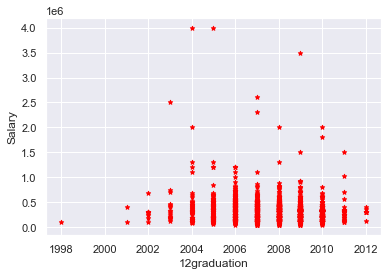

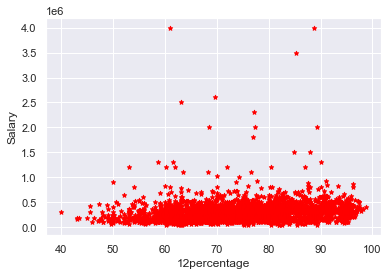

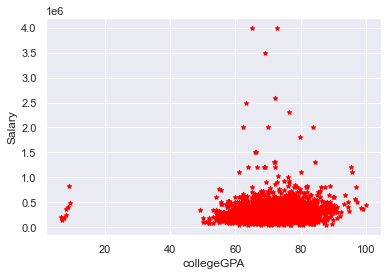

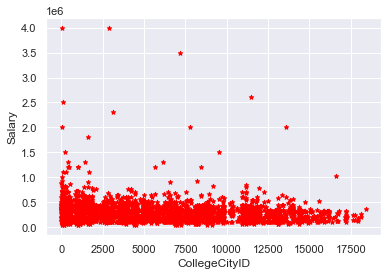

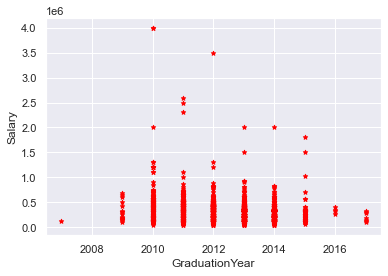

In [23]:
df.plot(kind = 'scatter', x = '12graduation', y = 'Salary', color = 'red', marker ='*')
df.plot(kind = 'scatter', x = '12percentage', y = 'Salary', color = 'red', marker ='*')
df.plot(kind = 'scatter', x = 'collegeGPA', y = 'Salary', color = 'red', marker ='*')
df.plot(kind = 'scatter', x = 'CollegeCityID', y = 'Salary', color = 'red', marker ='*')
df.plot(kind = 'scatter', x = 'GraduationYear', y = 'Salary', color = 'red', marker ='*')

## Clustering

In [24]:
kmeans = KMeans(3)
kmeans.fit(Z)

KMeans(n_clusters=3)

In [25]:
identified_clusters = kmeans.fit_predict(Z)
identified_clusters

array([0, 2, 0, ..., 0, 1, 0])

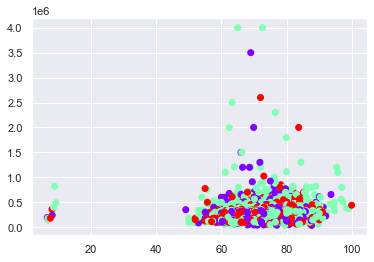

In [26]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = identified_clusters 
plt.scatter(df_with_clusters['collegeGPA'],df_with_clusters['Salary'],c=df_with_clusters['Clusters'],cmap='rainbow')

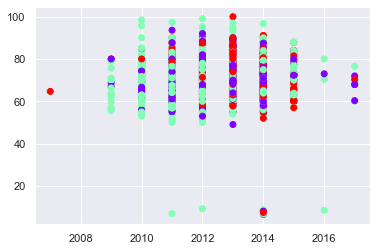

In [27]:
Z1_with_clusters = Z1.copy()
Z1_with_clusters['Clusters'] = identified_clusters 
plt.scatter(Z1_with_clusters['GraduationYear'],Z1_with_clusters['collegeGPA'],c=Z1_with_clusters['Clusters'],cmap='rainbow')